<a href="https://colab.research.google.com/github/DivyaNarayan0613/DivyaNarayan0613/blob/main/GARCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 financial time series analysis for the stock "IRCTC" using GARCH (Generalized Autoregressive Conditional Heteroskedasticity) modeling to estimate volatility. GARCH is a popular model used to analyze and forecast financial time series volatility.

Here's a step-by-step explanation of the code

    Importing Libraries: The code begins by importing required libraries such as NumPy, Matplotlib, Pandas, and other modules for handling the data and plotting.

    Uploading Data: The code expects you to upload a CSV file named "IRCTC.csv" that contains historical data for the stock "IRCTC" using the files.upload() function from Google Colab.

    Data Preparation: The code loads the CSV file into a Pandas DataFrame and prints some basic information about the DataFrame using df.info() and df.describe(). It also checks for any missing values using df.isnull().sum() and drops rows with missing values using df.dropna().

    Calculating Daily Returns: The code calculates the daily returns of the stock from its closing prices using the percentage change method and stores the result in a new column named "Return."

    Volatility Calculation: The code calculates the daily volatility, monthly volatility (assuming 21 trading days per month), and annual volatility (assuming 252 trading days per year) based on the daily returns.

    GARCH Modeling: The code installs the "arch" package and imports the required modules from "arch" for GARCH modeling.

    GARCH Model Fitting: The code fits a GARCH(1, 1) model to the daily returns data using the arch_model function from the "arch" package. It uses the "normal" distribution for the residuals.

    Forecasting Volatility: The code then forecasts the volatility for the next 5 periods (days) using the fitted GARCH model and prints the results.

    Rolling Predictions: Next, the code performs rolling predictions for volatility. It iterates over the last 20 data points and fits GARCH(1, 1) models with each iteration to forecast the volatility one step ahead. The forecasted volatility values are then plotted.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving IRCTC.csv to IRCTC (1).csv


In [ ]:
df=pd.read_csv('IRCTC.csv')

In [ ]:
df.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,18-Jul-23,EQ,626.00,628.05,620.0,625.55,623.55,622.85,624.07,774.9,557.1,"7,63,870",4.767060e+08,"25,312"
1,17-Jul-23,EQ,622.05,629.95,622.0,622.85,625.90,625.55,626.15,774.9,557.1,"10,06,467",6.301983e+08,"29,489"
2,14-Jul-23,EQ,619.90,623.70,616.6,617.75,623.05,622.85,621.29,774.9,557.1,"7,57,598",4.706880e+08,"28,004"
3,13-Jul-23,EQ,623.00,626.60,614.5,620.70,618.00,617.75,620.46,774.9,557.1,"9,66,834",5.998832e+08,"31,516"
4,12-Jul-23,EQ,619.85,622.45,615.1,619.00,619.95,620.70,619.03,774.9,557.1,"9,57,020",5.924199e+08,"34,572"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           247 non-null    object 
 1   series         247 non-null    object 
 2   OPEN           247 non-null    float64
 3   HIGH           247 non-null    float64
 4   LOW            247 non-null    float64
 5   PREV. CLOSE    247 non-null    float64
 6   ltp            247 non-null    float64
 7   close          247 non-null    float64
 8   vwap           247 non-null    float64
 9   52W H          247 non-null    object 
 10  52W L          247 non-null    float64
 11  VOLUME         247 non-null    object 
 12  VALUE          247 non-null    float64
 13  No of trades   247 non-null    object 
dtypes: float64(9), object(5)
memory usage: 27.1+ KB


In [ ]:
df.describe()

,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W L,VALUE
count,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,2.470000e+02
mean,658.851012,665.481174,651.913765,658.369838,658.379150,658.446154,658.912794,557.002834,1.412816e+09
std,50.167616,51.404829,49.454173,50.273061,50.073001,50.204452,50.468997,0.016628,1.700190e+09
min,563.000000,568.700000,557.100000,560.200000,560.700000,560.200000,563.090000,557.000000,3.061374e+08
25%,622.525000,627.725000,615.550000,621.375000,622.225000,622.325000,621.450000,557.000000,5.885107e+08
50%,643.000000,647.200000,637.000000,642.050000,642.000000,642.050000,641.040000,557.000000,8.956152e+08
75%,711.500000,719.500000,703.200000,712.150000,711.225000,712.150000,712.740000,557.000000,1.540975e+09
max,769.500000,774.900000,761.500000,763.900000,763.500000,763.900000,768.630000,557.100000,1.885725e+10


In [ ]:
df.shape

(247, 14)

In [ ]:
df.isnull().sum()

Date             0
series           0
OPEN             0
HIGH             0
LOW              0
PREV. CLOSE      0
ltp              0
close            0
vwap             0
52W H            0
52W L            0
VOLUME           0
VALUE            0
No of trades     0
dtype: int64

In [ ]:
df['Return'] = 100 * (df['close '].pct_change())

Text(0.5, 1.0, 'Daily Returns Over Time')

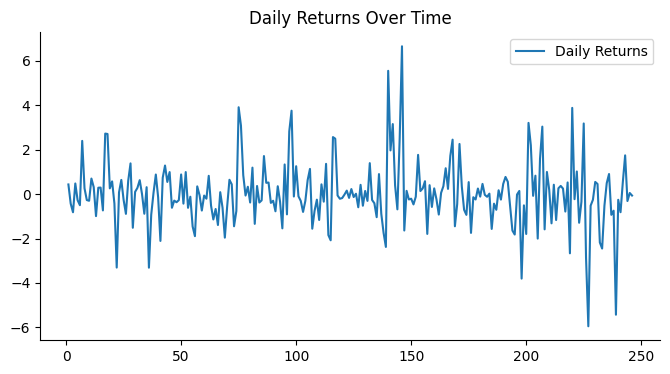

In [ ]:
df.dropna(inplace=True)

fig,ax = plt.subplots(figsize=(8,4))
ax.spines[['top','right']].set_visible(False)
plt.plot(df['Return'], label = 'Daily Returns')
plt.legend(loc='upper right')
plt.title('Daily Returns Over Time')

In [ ]:
import math
daily_volatility = df['Return'].std()

monthly_volatility = math.sqrt(21) * daily_volatility

annual_volatility = math.sqrt(252) * daily_volatility

from tabulate import tabulate

print(tabulate([['IRCTC',daily_volatility,monthly_volatility,annual_volatility]],headers = ['Daily Volatility %', 'Monthly Volatility %', 'Annual Volatility %'],tablefmt = 'fancy_grid',stralign='center',numalign='center',floatfmt=".2f"))

╒═══════╤══════════════════════╤════════════════════════╤═══════════════════════╕
│       │  Daily Volatility %  │  Monthly Volatility %  │  Annual Volatility %  │
╞═══════╪══════════════════════╪════════════════════════╪═══════════════════════╡
│ IRCTC │         1.45         │          6.66          │         23.08         │
╘═══════╧══════════════════════╧════════════════════════╧═══════════════════════╛


In [ ]:
pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 916.4/916.4 kB 15.3 MB/s eta 0:00:00


In [ ]:
import arch

In [ ]:
from arch import arch_model
from arch.__future__ import reindexing

garch_model = arch_model(df['Return'], p = 1, q = 1,
                      mean = 'constant', vol = 'GARCH', dist = 'normal')

gm_result = garch_model.fit(disp='off')
print(gm_result.params)

print('\n')

gm_forecast = gm_result.forecast(horizon = 5)
print(gm_forecast.variance[-1:])

mu         -0.011929
omega       1.177192
alpha[1]    0.564092
beta[1]     0.000000
Name: params, dtype: float64


          h.1       h.2       h.3      h.4       h.5
246  1.178827  1.842158  2.216338  2.42741  2.546474


In [ ]:
rolling_predictions = []
rolling_window = 20

# Check for missing or infinite values in the DataFrame
if df.isnull().values.any() or not np.isfinite(df['Return'].values).all():
    # Handle missing or infinite values if found
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(subset=['Return'], inplace=True)

for i in range(rolling_window, len(df) + 1):  # Update the range to include the last element
    train = df['Return'][:i]

    # Additional check to ensure that the training dataset has enough observations
    if len(train) > 1:
        print(f"Fitting model for index {i}...")
        print("Train data:", train)
        model = arch_model(train, p=1, q=1)
        model_fit = model.fit(disp='off')
        pred = model_fit.forecast(horizon=1)
        rolling_predictions.append(np.sqrt(pred.variance.values[-1, :][0]))
    else:
        rolling_predictions.append(np.nan)

print("Length of rolling_predictions:", len(rolling_predictions))
print("Length of DataFrame index:", len(df['Return'].index))

rolling_predictions = pd.Series(rolling_predictions, index=df['Return'].index)

fig, ax = plt.subplots(figsize=(10, 4))
ax.spines[['top', 'right']].set_visible(False)
plt.plot(rolling_predictions)
plt.title('Rolling Prediction')


Fitting model for index 20...
Train data: 1     0.433491
2    -0.431620
3    -0.818817
4     0.477539
5    -0.273884
6    -0.500808
7     2.394869
8     0.261635
9    -0.268860
10   -0.301300
11    0.699857
12    0.315906
13   -0.991970
14    0.286260
15    0.293371
16   -0.735236
17    2.723797
18    2.705846
19    0.256662
20    0.572246
Name: Return, dtype: float64
Fitting model for index 21...
Train data: 1     0.433491
2    -0.431620
3    -0.818817
4     0.477539
5    -0.273884
6    -0.500808
7     2.394869
8     0.261635
9    -0.268860
10   -0.301300
11    0.699857
12    0.315906
13   -0.991970
14    0.286260
15    0.293371
16   -0.735236
17    2.723797
18    2.705846
19    0.256662
20    0.572246
21   -0.426743
Name: Return, dtype: float64
Fitting model for index 22...
Train data: 1     0.433491
2    -0.431620
3    -0.818817
4     0.477539
5    -0.273884
6    -0.500808
7     2.394869
8     0.261635
9    -0.268860
10   -0.301300
11    0.699857
12    0.315906
13   -0.991970
14    

ValueError: ignored

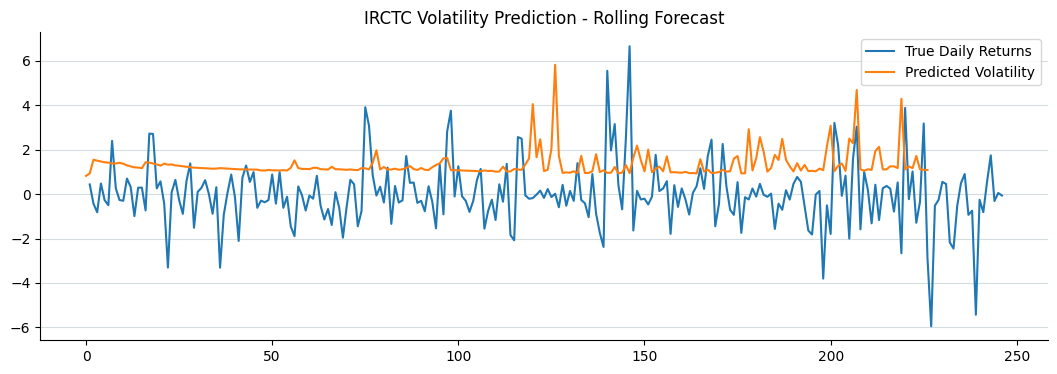

In [ ]:
fig,ax = plt.subplots(figsize=(13,4))
ax.grid(which="major", axis='y', color='#758D99', alpha=0.3, zorder=1)
ax.spines[['top','right']].set_visible(False)
plt.plot(df['Return'][-365:])
plt.plot(rolling_predictions)
plt.title('IRCTC Volatility Prediction - Rolling Forecast')
plt.legend(['True Daily Returns', 'Predicted Volatility'])